In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1_label0 = np.random.normal(1,1,(100,1))
x2_label0 = np.random.normal(1,1,(100,1))
x1_label1 = np.random.normal(5,1,(100,1))
x2_label1 = np.random.normal(4,1,(100,1))
x1_label2 = np.random.normal(8,1,(100,1))
x2_label2 = np.random.normal(0,1,(100,1))

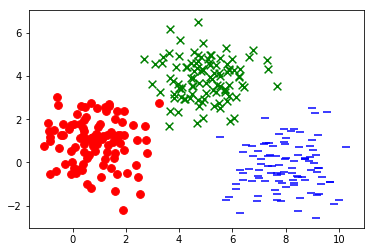

In [3]:
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

In [5]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))

labels = np.matrix([[1.,0.,0.]] * len(x1_label0) + [[0.,1.,0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

In [6]:
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [7]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))

test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1.,0.,0.]] * 10 + [[0.,1.,0.]] * 10 + [[0.,0.,1.]] * 10)

train_size, num_features = xs.shape

In [8]:
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

In [12]:
import tensorflow as tf

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [13]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        print(step, err)
    
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.861
1 141.965
2 425.587
3 625.885
4 55.4094
5 47.9959
6 50.4095
7 31.194
8 37.221
9 43.1555
10 48.3919
11 25.4522
12 32.0797
13 25.0735
14 19.9457
15 25.7155
16 16.9312
17 17.7896
18 22.9152
19 15.7473
20 15.8696
21 19.8473
22 13.7524
23 14.5378
24 17.7404
25 12.6903
26 13.3684
27 15.8258
28 11.6225
29 12.4703
30 14.2898
31 10.7872
32 11.7239
33 12.995
34 10.0699
35 11.115
36 11.9113
37 9.46288
38 10.6116
39 10.999
40 8.94503
41 10.1927
42 10.2281
43 8.50122
44 9.84027
45 9.57408
46 8.11874
47 9.54031
48 9.01674
49 7.78704
50 9.28158
51 8.53928
52 7.49736
53 9.0553
54 8.12774
55 7.24245
56 8.85466
57 7.77055
58 7.01636
59 8.67442
60 7.4582
61 6.81422
62 8.51059
63 7.18287
64 6.63208
65 8.36013
66 6.93826
67 6.46677
68 8.22072
69 6.71925
70 6.3157
71 8.09059
72 6.52172
73 6.17677
74 7.96839
75 6.34233
76 6.04831
77 7.85308
78 6.17841
79 5.92892
80 7.74385
81 6.02778
82 5.81747
83 7.64004
84 5.88864
85 5.713
86 7.54115
87 5.75954
88 5.61472
89 7.44675
90 5.63926
91 5.52197
92 7.356